<img style="float: left;" src="../images/earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education

# Week X Homework Template

This week, you will explore `topic X`.  You will use `Y data` provided by `Z source` to complete the following tasks:
1. A
2. B
3. C

In [1]:
# Core imports needed for grading
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts

In [2]:
# These functions will be removed from here and imported to simplify notebook
def run_test(func, points, *args, correct_message="default correct", error_message="default error", **kwargs):
    results = {"points": 0, "pass": False}
    score = 0
    try:
        fname = func.__name__
        results['description'] = fname
        func(*args, **kwargs)
    except Exception as e:
        results['message'] = error_message
        results['traceback'] = e
        pass
    else:
        results['pass'] = True
        results['message'] = correct_message
        results['points'] = points
    
    return results
   
def output_results(results):
    points = 0
    for r in results:
        points += r['points']
        print("Results for test '{}':".format(r['description']))
        if (r['pass']):
            print(" Pass! {msg} ({p} points)".format(msg=r['message'],p=r['points']))
        else:
            print(" Fail! {msg} ({p} points)".format(msg=r['message'],p=r['points']))
            print(" Traceback: {t}".format(t=r['traceback']))
    return points

## Import Python Packages

In the cell below, import the necessary **Python** packages that you need to complete this assignment. 

Be sure to add your code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code.

In [3]:
# Import necessary Python packages

# BEGIN SOLUTION

import os
import matplotlib.pyplot as plt
import pandas as pd
import earthpy as et

# END SOLUTION

## Download Data and Set Working Directory

In the cell below, download the necessary data for this assignment and set the working directory. 

Be sure to add your code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code.

In [4]:
# BEGIN SOLUTION

# Download data 
url = "https://ndownloader.figshare.com/files/12767933"
et.data.get_data(url=url)

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# END SOLUTION

In [5]:
### BEGIN HIDDEN TESTS

results = []

## Test working directory
def assert_work_dir():
    assert os.getcwd() == os.path.join(et.io.HOME, 'earth-analytics'), "Incorrect working directory"

work_dir_test = run_test(assert_work_dir, 2, 
                  correct_message="Your working directory is correct.",
                  error_message="Check your working directory.")

results.append(work_dir_test)

output_results(results)
    
### END HIDDEN TESTS

Results for test 'assert_work_dir':
 Pass! Your working directory is correct. (2 points)


2

## Create Plot of X

In the cell below, add your code to create a plot of `X`.  

Be sure to include:
1. An appropriate plot title.
2. Clear labels for the axes (including units of measurements where applicable).

Be sure to add your code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code.

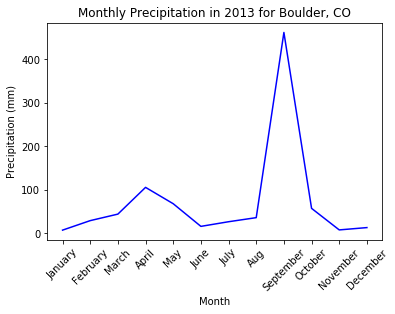

In [6]:
# Create plot

# BEGIN SOLUTION

# Import to pandas dataframe
fname = "data/earthpy-downloads/boulder-precip-2007-to-2017-months-seasons.csv"
precip_2007_to_2017_months = pd.read_csv(fname)

fig, ax = plt.subplots()

# Add the x-axis and the y-axis to the plot
ax.plot(precip_2007_to_2017_months.months, precip_2007_to_2017_months.y2013, color="blue")

# Set plot title and axes labels
ax.set(title="Monthly Precipitation in 2013 for Boulder, CO",
       xlabel="Month", ylabel="Precipitation (mm)")
    
# rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45);

# Note - using plt.show() rather than the semi-colon (;)
# results in an extra empty plot being displayed 
# and the tests to fail 

# END SOLUTION

### DO NOT REMOVE LINE BELOW ###
ts_1_plot = nb.convert_axes(plt)

## Explain Plot

In the `Markdown` cell below, answer the following questions about your plot:
1. A?
2. B?

Remove any existing text in the cell before adding your answer.

### Replace this text with your answer


## Data Questions

In the cell below, add your code to determine the following about `Y data`:
1. A
2. B

Be sure to add your code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code.

In [7]:
# BEGIN SOLUTION

precip_2007_to_2017_months.describe()

# END SOLUTION

,y2007,y2008,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,36.258500,36.025667,46.968833,43.010667,47.180500,33.125833,72.284167,49.889833,56.980667,36.512500,46.545500
std,16.255323,30.170129,41.998067,32.757735,32.716312,35.196515,125.809508,33.508307,57.141977,30.502529,40.999512
min,9.652000,2.286000,6.858000,6.350000,8.382000,0.254000,6.858000,17.272000,3.556000,9.398000,11.430000
25%,21.463000,14.922500,14.478000,14.668500,25.654000,9.525000,14.795500,27.686000,9.652000,11.811000,18.224500
50%,42.799000,31.877000,35.687000,30.988000,38.100000,23.114000,32.131000,40.894000,45.593000,25.019000,36.322000
75%,46.863000,41.783000,70.993000,72.580500,62.166500,46.228000,59.563000,53.911500,80.200500,53.340000,51.943000
max,56.896000,106.934000,149.352000,92.202000,131.064000,126.746000,461.264000,116.078000,198.628000,97.536000,159.766000


In [8]:
# Locked Grading Cell
## Visible test
hw_plot1 = ts.TimeSeriesTester(ts_1_plot)

plot_x_lab_test = run_test(hw_plot1.assert_axis_label_contains, 2, axis="x", lst=["Month"],
                  correct_message="Your x axis label contains the appropriate keywords.",
                  error_message="Check your x axis label for a more appropriate label.")
results.append(plot_x_lab_test)

plot_y_lab_test = run_test(hw_plot1.assert_axis_label_contains, 2, axis="y", lst=["Precip", "mm"], 
                  correct_message="Your y axis label contains the appropriate keywords and units identified.",
                  error_message="Check your y axis label for a more appropriate label with units identified.")
results.append(plot_y_lab_test)

plot_title_test = run_test(hw_plot1.assert_title_contains, 2, ["Month", "Precip", "2013"],
                   correct_message="Plot title contains the appropriate keywords.",
                   error_message="Check your plot title words for a more appropriate title.")
results.append(plot_title_test)

output_results(results)

Results for test 'assert_work_dir':
 Pass! Your working directory is correct. (2 points)
Results for test 'assert_axis_label_contains':
 Pass! Your x axis label contains the appropriate keywords. (2 points)
Results for test 'assert_axis_label_contains':
 Pass! Your y axis label contains the appropriate keywords and units identified. (2 points)
Results for test 'assert_title_contains':
 Pass! Plot title contains the appropriate keywords. (2 points)


8

In [9]:
### BEGIN HIDDEN TESTS

plot_type_test = run_test(hw_plot1.assert_plot_type, 3, 'line', 
                 correct_message="Your plot is of the correct type.",
                 error_message="Check your plot type.")
results.append(plot_type_test)

# Create expected data: full correct answer
precip_2007_to_2017_months = pd.read_csv("data/earthpy-downloads/boulder-precip-2007-to-2017-months-seasons.csv")
precip_2007_to_2017_months.reset_index(inplace=True)
precip_2013 = precip_2007_to_2017_months[["index", "y2013"]]

# Add test to ensure the df has the correct values
data_test = run_test(hw_plot1.assert_xydata, 6, xy_expected=precip_2013, 
                correct_message="Plot includes correct data",
                error_message="Check your plot data.",
                xcol="index",
                ycol="y2013")

results.append(data_test)

output_results(results)

### END HIDDEN TESTS

Results for test 'assert_work_dir':
 Pass! Your working directory is correct. (2 points)
Results for test 'assert_axis_label_contains':
 Pass! Your x axis label contains the appropriate keywords. (2 points)
Results for test 'assert_axis_label_contains':
 Pass! Your y axis label contains the appropriate keywords and units identified. (2 points)
Results for test 'assert_title_contains':
 Pass! Plot title contains the appropriate keywords. (2 points)
Results for test 'assert_plot_type':
 Pass! Your plot is of the correct type. (3 points)
Results for test 'assert_xydata':
 Pass! Plot includes correct data (6 points)


17